In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Reading in data from archive 
# - postings, benefits, industries, skills and salaries
df_postings = pd.read_csv('archive/postings.csv')
#Jobs
df_benefits = pd.read_csv('archive/jobs/benefits.csv')
df_industries = pd.read_csv('archive/jobs/job_industries.csv')
df_skills = pd.read_csv('archive/jobs/job_skills.csv')
df_salaries = pd.read_csv('archive/jobs/salaries.csv')
df_postings.shape

(123849, 31)

# Data review using pandas

This section performs a systematic data review for the project datasets that were loaded earlier.

Steps included:
- Show shapes (rows, columns) for each DataFrame loaded
- Display column names and dtypes
- Show summary statistics with .describe()
- List unique values / top counts for categorical columns
- Plot histograms and boxplots for numeric distributions
- Per-feature summary (value_counts or describe)
- Correlation heatmap for numeric features


# Show shapes (rows, columns) for each DataFrame loaded

In [95]:
# Print shape (rows, cols) for each dataframe
print('df_postings shape:', df_postings.shape)
print('df_benefits shape:', df_benefits.shape)
print('df_industries shape:', df_industries.shape)
print('df_skills shape:', df_skills.shape)
print('df_salaries shape:', df_salaries.shape)


df_postings shape: (123849, 31)
df_benefits shape: (67943, 3)
df_industries shape: (164808, 2)
df_skills shape: (213768, 2)
df_salaries shape: (40785, 8)


# Display column names and dtypes


In [96]:
# Show column names and data types for main dataframe (postings)
print('\nColumns and dtypes for df_postings:')
df_postings.dtypes



Columns and dtypes for df_postings:


job_id                          int64
company_name                   object
title                          object
description                    object
max_salary                    float64
pay_period                     object
location                       object
company_id                    float64
views                         float64
med_salary                    float64
min_salary                    float64
formatted_work_type            object
applies                       float64
original_listed_time          float64
remote_allowed                float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency    

# Show summary statistics with .describe()

In [97]:
# Quick summary statistics
print('\nNumeric summary (describe) for df_postings:')
df_postings.select_dtypes(include=[np.number]).describe().T

print('\nAll columns summary (describe include=all) - note: object columns will show counts/unique/top/freq:')
df_postings.describe(include='all').T


Numeric summary (describe) for df_postings:

All columns summary (describe include=all) - note: object columns will show counts/unique/top/freq:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,123849.0,NaN,NaN,NaN,3896402138.074615,84043545.161881,921716.0,3894586595.0,3901998406.0,3904707077.0,3906267224.0
company_name,122130,24428,Liberty Healthcare and Rehabilitation Services,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,123849,72521,Sales Manager,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,123842,107827,Position Summary: Our Sales Manager has managi...,474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_salary,29793.0,NaN,NaN,NaN,91939.423461,701110.138622,1.0,48.28,80000.0,140000.0,120000000.0
pay_period,36073,5,YEARLY,20628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,123849,8526,United States,8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_id,122132.0,NaN,NaN,NaN,12204012.335015,25541431.65742,1009.0,14352.0,226965.0,8047188.0,103472979.0
views,122160.0,NaN,NaN,NaN,14.618247,85.903598,1.0,3.0,4.0,8.0,9975.0
med_salary,6280.0,NaN,NaN,NaN,22015.619876,52255.873846,0.0,18.94,25.5,2510.5,750000.0


# List unique values / top counts for categorical columns

In [98]:
# Unique values and top value counts for categorical columns in df_postings
cat_cols = df_postings.select_dtypes(include=['object','category']).columns.tolist()
print('Categorical columns found:', cat_cols)

for c in cat_cols:
    print('\n===', c, '===')
    try:
        vc = df_postings[c].value_counts(dropna=False)
        print('unique values:', df_postings[c].nunique(dropna=False))
        display(vc.head(10))
    except Exception as e:
        print('Could not compute value_counts for', c, "->", e)


Categorical columns found: ['company_name', 'title', 'description', 'pay_period', 'location', 'formatted_work_type', 'job_posting_url', 'application_url', 'application_type', 'formatted_experience_level', 'skills_desc', 'posting_domain', 'work_type', 'currency', 'compensation_type']

=== company_name ===
unique values: 24429


company_name
NaN                                               1719
Liberty Healthcare and Rehabilitation Services    1108
The Job Network                                   1003
J. Galt                                            604
TEKsystems                                         529
Lowe's Companies, Inc.                             527
Ingersoll Rand                                     517
Capital One                                        496
Cogent Communications                              476
Insight Global                                     418
Name: count, dtype: int64


=== title ===
unique values: 72521


title
Sales Manager                      673
Customer Service Representative    373
Project Manager                    354
Administrative Assistant           254
Senior Accountant                  238
Executive Assistant                228
Salesperson                        211
Registered Nurse                   210
Receptionist                       204
Staff Accountant                   200
Name: count, dtype: int64


=== description ===
unique values: 107828


description
Position Summary: Our Sales Manager has managing partnerresponsibilities for a team of 5-25 Executive Consultants in marketing J.Galt's SaaS memberships and consulting services. In addition, the ManagingPartner/Sales Manager represents J. Galt in attracting memberships throughchannel partners, strategic alliances, chambers of commerce, and state,trade, and professional associations.\nOur Mission: We believe in helping small and medium-sized businessessucceed. It is tragic that most business owners carry the credit needs oftheir business. They often rely on personal credit cards, or they signpersonally for the business to access the funding, equipment, or facilities thebusiness requires to operate.\nWhat We Do: J. Galt Finance Suite offers a SaaS platform and consultativeservices to small and medium-sized business owners. Our system includes aproven 7-step process to build credit for a business around the business EINwithout personal guarantees or using the owner’s personal 


=== pay_period ===
unique values: 6


pay_period
NaN         87776
YEARLY      20628
HOURLY      14741
MONTHLY       518
WEEKLY        177
BIWEEKLY        9
Name: count, dtype: int64


=== location ===
unique values: 8526


location
United States    8125
New York, NY     2756
Chicago, IL      1834
Houston, TX      1762
Dallas, TX       1383
Atlanta, GA      1363
Boston, MA       1176
Austin, TX       1083
Charlotte, NC    1075
Phoenix, AZ      1059
Name: count, dtype: int64


=== formatted_work_type ===
unique values: 7


formatted_work_type
Full-time     98814
Contract      12117
Part-time      9696
Temporary      1190
Internship      983
Volunteer       562
Other           487
Name: count, dtype: int64


=== job_posting_url ===
unique values: 123849


job_posting_url
https://www.linkedin.com/jobs/view/3906267224/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/921716/?trk=jobs_biz_prem_srch        1
https://www.linkedin.com/jobs/view/1829192/?trk=jobs_biz_prem_srch       1
https://www.linkedin.com/jobs/view/10998357/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/23221523/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/35982263/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/91700727/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/103254301/?trk=jobs_biz_prem_srch     1
https://www.linkedin.com/jobs/view/112576855/?trk=jobs_biz_prem_srch     1
https://www.linkedin.com/jobs/view/3906265303/?trk=jobs_biz_prem_srch    1
Name: count, dtype: int64


=== application_url ===
unique values: 84801


application_url
NaN                                                                                                                                                  36665
https://app.dataannotation.tech/worker_signup?projects=PROG_SA&worker_src=L&utm_medium=display&utm_source=linkedin&utm_campaign=softwaredeveloper      205
https://revature.com/jobs/entry-level-automotive-engineer/?utm_source=linkedin&sourcedBy=BalaLP                                                         67
https://app.dataannotation.tech/worker_signup?worker_src=LI&utm_medium=display&utm_source=linkedin&utm_campaign=aicontentwriter                         60
https://www.english1.com/apply-now/?utm_source=linkedin&utm_medium=listing&utm_term=china&utm_content=linkedin&utm_campaign=linkedin                    44
https://optimabiosupply.com/job-opening-data-entry-clerk/                                                                                               43
https://dataforcecommunity.transperfect.com/project/am


=== application_type ===
unique values: 4


application_type
OffsiteApply          84607
ComplexOnsiteApply    31049
SimpleOnsiteApply      8192
UnknownApply              1
Name: count, dtype: int64


=== formatted_experience_level ===
unique values: 7


formatted_experience_level
Mid-Senior level    41489
Entry level         36708
NaN                 29409
Associate            9826
Director             3746
Internship           1449
Executive            1222
Name: count, dtype: int64


=== skills_desc ===
unique values: 2213


skills_desc
NaN                                                                                                                                                                                     121410
This position requires the following skills: Elder care, Healthcare, Hospice Care, Patient Care                                                                                             28
This position requires the following skills: Advocacy, Community Outreach, CSR / Volunteer Coordination, Fundraising, Lobbying, Public Relations                                            19
Optometry, Contact Lenses, Glaucoma, Ocular Disease, Eye Exams, Cataract, Low Vision, Diabetes, Eyewear                                                                                     19
This position requires the following skills: Accounting                                                                                                                                     14
This position requires the follow


=== posting_domain ===
unique values: 4444


posting_domain
NaN                         39968
www.click2apply.net          3811
click.appcast.io             2255
jsv3.recruitics.com          1921
jobs.smartrecruiters.com     1557
boards.greenhouse.io         1493
rr.jobsyn.org                1202
recruiting.ultipro.com       1175
recruiting.adp.com            809
sjobs.brassring.com           785
Name: count, dtype: int64


=== work_type ===
unique values: 7


work_type
FULL_TIME     98814
CONTRACT      12117
PART_TIME      9696
TEMPORARY      1190
INTERNSHIP      983
VOLUNTEER       562
OTHER           487
Name: count, dtype: int64


=== currency ===
unique values: 7


currency
NaN    87776
USD    36058
EUR        6
CAD        3
BBD        2
AUD        2
GBP        2
Name: count, dtype: int64


=== compensation_type ===
unique values: 2


compensation_type
NaN            87776
BASE_SALARY    36073
Name: count, dtype: int64

# Plot histograms and boxplots for numeric distributions

In [99]:
# Plot distributions for numeric columns (histograms + boxplots)
import seaborn as sns
sns.set(style='whitegrid')

num_cols = df_postings.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)

if len(num_cols) > 0:
    # Histograms
    df_postings[num_cols].hist(bins=30, figsize=(12, 3*len(num_cols)), layout=(len(num_cols),1))
    plt.tight_layout()

    # Boxplots (one per numeric column)
    for c in num_cols:
        plt.figure(figsize=(8,2))
        sns.boxplot(x=df_postings[c])
        plt.title(f'Boxplot: {c}')
        plt.show()
else:
    print('No numeric columns to plot.')


ModuleNotFoundError: No module named 'seaborn'

# Per-feature summary (value_counts or describe)


In [ ]:
# Per-feature quick analysis: for numeric -> describe, for categorical -> top 10 counts
for c in df_postings.columns:
    print('\n----- Feature:', c, '-----')
    if pd.api.types.is_numeric_dtype(df_postings[c]):
        display(df_postings[c].describe().to_frame())
    else:
        vc = df_postings[c].value_counts(dropna=False).head(10)
        display(vc)



----- Feature: job_id -----


,job_id
count,1.238490e+05
mean,3.896402e+09
std,8.404355e+07
min,9.217160e+05
25%,3.894587e+09
50%,3.901998e+09
75%,3.904707e+09
max,3.906267e+09



----- Feature: company_name -----


company_name
NaN                                               1719
Liberty Healthcare and Rehabilitation Services    1108
The Job Network                                   1003
J. Galt                                            604
TEKsystems                                         529
Lowe's Companies, Inc.                             527
Ingersoll Rand                                     517
Capital One                                        496
Cogent Communications                              476
Insight Global                                     418
Name: count, dtype: int64


----- Feature: title -----


title
Sales Manager                      673
Customer Service Representative    373
Project Manager                    354
Administrative Assistant           254
Senior Accountant                  238
Executive Assistant                228
Salesperson                        211
Registered Nurse                   210
Receptionist                       204
Staff Accountant                   200
Name: count, dtype: int64


----- Feature: description -----


description
Position Summary: Our Sales Manager has managing partnerresponsibilities for a team of 5-25 Executive Consultants in marketing J.Galt's SaaS memberships and consulting services. In addition, the ManagingPartner/Sales Manager represents J. Galt in attracting memberships throughchannel partners, strategic alliances, chambers of commerce, and state,trade, and professional associations.\nOur Mission: We believe in helping small and medium-sized businessessucceed. It is tragic that most business owners carry the credit needs oftheir business. They often rely on personal credit cards, or they signpersonally for the business to access the funding, equipment, or facilities thebusiness requires to operate.\nWhat We Do: J. Galt Finance Suite offers a SaaS platform and consultativeservices to small and medium-sized business owners. Our system includes aproven 7-step process to build credit for a business around the business EINwithout personal guarantees or using the owner’s personal 


----- Feature: max_salary -----


,max_salary
count,2.979300e+04
mean,9.193942e+04
std,7.011101e+05
min,1.000000e+00
25%,4.828000e+01
50%,8.000000e+04
75%,1.400000e+05
max,1.200000e+08



----- Feature: pay_period -----


pay_period
NaN         87776
YEARLY      20628
HOURLY      14741
MONTHLY       518
WEEKLY        177
BIWEEKLY        9
Name: count, dtype: int64


----- Feature: location -----


location
United States    8125
New York, NY     2756
Chicago, IL      1834
Houston, TX      1762
Dallas, TX       1383
Atlanta, GA      1363
Boston, MA       1176
Austin, TX       1083
Charlotte, NC    1075
Phoenix, AZ      1059
Name: count, dtype: int64


----- Feature: company_id -----


,company_id
count,1.221320e+05
mean,1.220401e+07
std,2.554143e+07
min,1.009000e+03
25%,1.435200e+04
50%,2.269650e+05
75%,8.047188e+06
max,1.034730e+08



----- Feature: views -----


,views
count,122160.000000
mean,14.618247
std,85.903598
min,1.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,9975.000000



----- Feature: med_salary -----


,med_salary
count,6280.000000
mean,22015.619876
std,52255.873846
min,0.000000
25%,18.940000
50%,25.500000
75%,2510.500000
max,750000.000000



----- Feature: min_salary -----


,min_salary
count,2.979300e+04
mean,6.491085e+04
std,4.959738e+05
min,1.000000e+00
25%,3.700000e+01
50%,6.000000e+04
75%,1.000000e+05
max,8.500000e+07



----- Feature: formatted_work_type -----


formatted_work_type
Full-time     98814
Contract      12117
Part-time      9696
Temporary      1190
Internship      983
Volunteer       562
Other           487
Name: count, dtype: int64


----- Feature: applies -----


,applies
count,23320.000000
mean,10.591981
std,29.047395
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,967.000000



----- Feature: original_listed_time -----


,original_listed_time
count,1.238490e+05
mean,1.713152e+12
std,4.848209e+08
min,1.701811e+12
25%,1.712863e+12
50%,1.713395e+12
75%,1.713478e+12
max,1.713573e+12



----- Feature: remote_allowed -----


,remote_allowed
count,15246.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0



----- Feature: job_posting_url -----


job_posting_url
https://www.linkedin.com/jobs/view/921716/?trk=jobs_biz_prem_srch        1
https://www.linkedin.com/jobs/view/3903893002/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891958/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891956/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891949/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891926/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891876/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891836/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891835/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/3903891819/?trk=jobs_biz_prem_srch    1
Name: count, dtype: int64


----- Feature: application_url -----


application_url
NaN                                                                                                                                                  36665
https://app.dataannotation.tech/worker_signup?projects=PROG_SA&worker_src=L&utm_medium=display&utm_source=linkedin&utm_campaign=softwaredeveloper      205
https://revature.com/jobs/entry-level-automotive-engineer/?utm_source=linkedin&sourcedBy=BalaLP                                                         67
https://app.dataannotation.tech/worker_signup?worker_src=LI&utm_medium=display&utm_source=linkedin&utm_campaign=aicontentwriter                         60
https://www.english1.com/apply-now/?utm_source=linkedin&utm_medium=listing&utm_term=china&utm_content=linkedin&utm_campaign=linkedin                    44
https://optimabiosupply.com/job-opening-data-entry-clerk/                                                                                               43
https://dataforcecommunity.transperfect.com/project/am


----- Feature: application_type -----


application_type
OffsiteApply          84607
ComplexOnsiteApply    31049
SimpleOnsiteApply      8192
UnknownApply              1
Name: count, dtype: int64


----- Feature: expiry -----


,expiry
count,1.238490e+05
mean,1.716213e+12
std,2.321394e+09
min,1.712903e+12
25%,1.715481e+12
50%,1.716042e+12
75%,1.716088e+12
max,1.729125e+12



----- Feature: closed_time -----


,closed_time
count,1.073000e+03
mean,1.712928e+12
std,3.622893e+08
min,1.712346e+12
25%,1.712670e+12
50%,1.712670e+12
75%,1.713283e+12
max,1.713562e+12



----- Feature: formatted_experience_level -----


formatted_experience_level
Mid-Senior level    41489
Entry level         36708
NaN                 29409
Associate            9826
Director             3746
Internship           1449
Executive            1222
Name: count, dtype: int64


----- Feature: skills_desc -----


skills_desc
NaN                                                                                                                                                                                     121410
This position requires the following skills: Elder care, Healthcare, Hospice Care, Patient Care                                                                                             28
This position requires the following skills: Advocacy, Community Outreach, CSR / Volunteer Coordination, Fundraising, Lobbying, Public Relations                                            19
Optometry, Contact Lenses, Glaucoma, Ocular Disease, Eye Exams, Cataract, Low Vision, Diabetes, Eyewear                                                                                     19
This position requires the following skills: Animal Care / Handling, Animal Therapy, Elder care, Healthcare, Hospice Care, Patient Care                                                     14
This position requires the follow


----- Feature: listed_time -----


,listed_time
count,1.238490e+05
mean,1.713204e+12
std,3.989122e+08
min,1.711317e+12
25%,1.712886e+12
50%,1.713408e+12
75%,1.713484e+12
max,1.713573e+12



----- Feature: posting_domain -----


posting_domain
NaN                         39968
www.click2apply.net          3811
click.appcast.io             2255
jsv3.recruitics.com          1921
jobs.smartrecruiters.com     1557
boards.greenhouse.io         1493
rr.jobsyn.org                1202
recruiting.ultipro.com       1175
recruiting.adp.com            809
sjobs.brassring.com           785
Name: count, dtype: int64


----- Feature: sponsored -----


,sponsored
count,123849.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0



----- Feature: work_type -----


work_type
FULL_TIME     98814
CONTRACT      12117
PART_TIME      9696
TEMPORARY      1190
INTERNSHIP      983
VOLUNTEER       562
OTHER           487
Name: count, dtype: int64


----- Feature: currency -----


currency
NaN    87776
USD    36058
EUR        6
CAD        3
BBD        2
AUD        2
GBP        2
Name: count, dtype: int64


----- Feature: compensation_type -----


compensation_type
NaN            87776
BASE_SALARY    36073
Name: count, dtype: int64


----- Feature: normalized_salary -----


,normalized_salary
count,3.607300e+04
mean,2.053270e+05
std,5.097627e+06
min,0.000000e+00
25%,5.200000e+04
50%,8.150000e+04
75%,1.250000e+05
max,5.356000e+08



----- Feature: zip_code -----


,zip_code
count,102977.000000
mean,50400.491887
std,30252.232515
min,1001.000000
25%,24112.000000
50%,48059.000000
75%,78201.000000
max,99901.000000



----- Feature: fips -----


,fips
count,96434.000000
mean,28713.879887
std,16015.929825
min,1003.000000
25%,13121.000000
50%,29183.000000
75%,42077.000000
max,56045.000000


# Correlation heatmap for numeric features

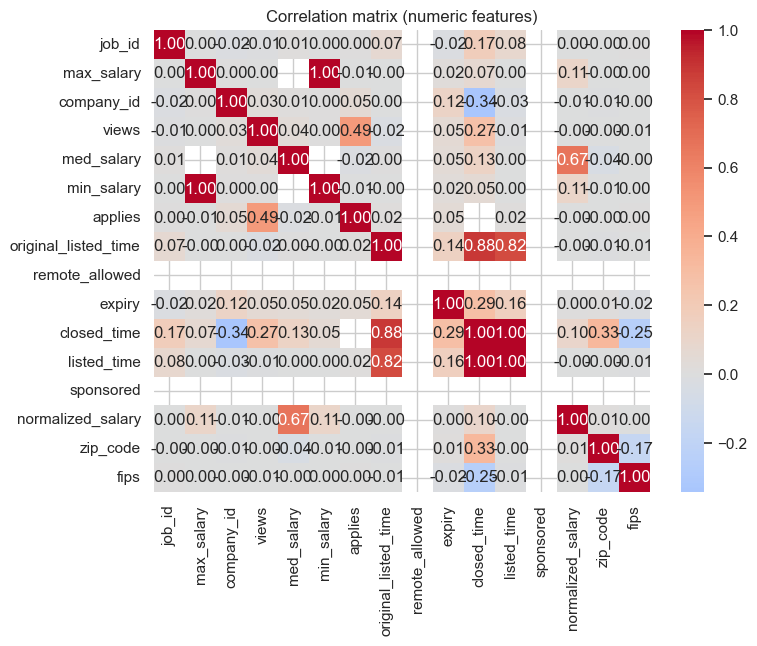

In [ ]:
# Correlation matrix and heatmap for numeric features
num_df = df_postings.select_dtypes(include=[np.number])
if not num_df.empty:
    corr = num_df.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation matrix (numeric features)')
    plt.show()
else:
    print('No numeric features to compute correlation.')


## How to interpret correlation coefficients (heatmap)

- Correlation values shown in the heatmap are Pearson correlation coefficients which measure linear relationship between two numeric features.
- Range: -1.00 to 1.00
  - Close to 1.00: strong positive linear relationship (as feature A increases, feature B tends to increase).
  - Close to -1.00: strong negative linear relationship (as feature A increases, feature B tends to decrease).
  - Close to 0.00: little or no linear relationship (features appear uncorrelated in a linear sense).

- Practical thresholds (rule-of-thumb):
  - |r| >= 0.7 — strong correlation (watch for multicollinearity if using linear models).
  - 0.3 <= |r| < 0.7 — moderate correlation (may be interesting depending on domain).
  - |r| < 0.3 — weak or negligible linear relationship.

- Important notes:
  - Correlation does not imply causation. A high |r| only indicates association, not a causal link.
  - Pearson correlation only captures linear relationships. Two variables can be strongly related nonlinearly and still show low Pearson r.
  - Outliers can strongly affect correlation values; inspect scatter plots or robust measures if a surprising correlation appears.

Suggested actions when you see strong correlations:
- If two features are highly correlated (|r| >= 0.7), consider removing one, combining them, or using dimensionality reduction (PCA) to avoid multicollinearity in regression-style models.
- For moderate correlations, verify domain relevance before taking action — moderate correlation can be useful predictive information.
- For near-zero correlations, the features may still be useful in non-linear models; don't discard solely on low Pearson r without further checks.


## Why use histograms and boxplots

- Histograms
  - What: show the distribution of a single numeric variable by binning values and plotting counts (or density) per bin.
  - What you learn: modality (uni/bi/multi-modal), skewness (left/right), spread, gaps, and approximate density of values.
  - Limitations: results depend on bin width and edges; can hide small numbers of outliers; less precise for comparing multiple groups unless using multiple histograms or normalized densities.

- Boxplots (a.k.a. box-and-whisker)
  - What: show five-number summary (minimum, first quartile Q1, median, third quartile Q3, maximum) and identify outliers beyond the whiskers (commonly 1.5 * IQR).
  - What you learn: central tendency (median), spread (IQR), skew (median vs center of box), and clear identification of outliers.
  - Strengths: compact, robust to binning choices, excellent for side-by-side comparisons across groups or categories.
  - Limitations: does not show modality or detailed shape of the distribution (e.g., bimodality will be hidden).

- Why use both together
  - They complement each other: histogram reveals the full shape (peaks, gaps), while the boxplot highlights summary statistics and outliers.
  - Use histogram to understand the distribution shape and decide if transformations (log, sqrt) are needed; use boxplot to compare spread and detect outliers quickly.

- Practical tips
  - For heavily skewed numeric features, consider plotting the histogram on a log scale or plotting both original and transformed versions.
  - When there are many numeric columns, plot a selected subset or create small multiples (grid) to keep figures readable.
  - Combine with value counts and summary statistics (mean, median, std, IQR, missing%) to make informed preprocessing decisions.

This explanation supplements the histogram and boxplot cells earlier — run those cells to see the visualizations, then refer back here to guide interpretation.


# Cleaning Data for df_postings
## Merging df_posting with Salaries
Due to the missing amount of salaries data in df_posting, I merged df_posting with df_salaries to get a more comprehensive view on the salires of each job posting 
Given the Data evaluation above we will perform the following cleaning
NaN
- There are almost no columns without missing values
  - company_name : "Unknown" 
  - company_id : "Unknown"
  - views : 0
  - Description: ""
  - formatted_experince_level "Unknown"
  - posting_domain: "Unknown"
  - remote_allowed: "Unknown"
  - zip_code: "Unknown" 
  - min_salary: 0
  - med_salary: 0
  - max_salary: 0
  - normalized_salary: 0
  - skills_desc: ""
- We should drop these columns because there's not enough info or data 
  - application_url
  - pay_period
  - applies
  - close_time
  - currency
  - compensation_type
  - flips
 


In [ ]:
#Replace
df_postings['company_name'] = df_postings['company_name'].fillna("Unknown")
df_postings['company_id'] = df_postings['company_id'].fillna("Unknown")
df_postings['views'] = df_postings['views'].fillna(0)
df_postings['formatted_experience_level'] = df_postings['formatted_experience_level'].fillna("Unknown")
df_postings['description'] = df_postings['description'].fillna("")
df_postings['posting_domain'] = df_postings['posting_domain'].fillna("Unknown")
df_postings['remote_allowed'] = df_postings['remote_allowed'].fillna("Unknown")
df_postings['zip_code'] = df_postings['zip_code'].fillna("Unknown")
df_postings['min_salary'] = df_postings['min_salary'].fillna(0)
df_postings['med_salary'] = df_postings['med_salary'].fillna(0)
df_postings['max_salary'] = df_postings['max_salary'].fillna(0)
df_postings['normalized_salary'] = df_postings['normalized_salary'].fillna(0)
df_postings['skills_desc'] = df_postings['skills_desc'].fillna("")

#Drops 
columns_to_drop = [
    'application_url',
    'pay_period',
    'applies',
    'closed_time',
    'currency',
    'compensation_type',
    'fips'
]

df_postings = df_postings.drop(columns=[c for c in columns_to_drop if c in df_postings.columns])
df_postings.isna().any()


job_id                        False
company_name                  False
title                         False
description                   False
max_salary                    False
location                      False
company_id                    False
views                         False
med_salary                    False
min_salary                    False
formatted_work_type           False
original_listed_time          False
remote_allowed                 True
job_posting_url               False
application_type              False
expiry                        False
formatted_experience_level    False
skills_desc                   False
listed_time                   False
posting_domain                False
sponsored                     False
work_type                     False
normalized_salary             False
zip_code                      False
dtype: bool

## Cleaning Data for df_skills
df_skills does't have any NaN, Everything looks consistant, I don't think we need further cleaning here. 
## Abbreviation to full skill definition
job_function_map = {
    'MRKT': 'Marketing',
    'PR': 'Public Relations',
    'WRT': 'Writing',
    'SALE': 'Sales',
    'FIN': 'Finance',
    'ADVR': 'Advertising',
    'BD': 'Business Development',
    'ENG': 'Engineering',
    'PRJM': 'Project Management',
    'IT': 'Information Technology',
    'GENB': 'General Business',
    'ADM': 'Administration',
    'SUPL': 'Supply Chain',
    'MNFC': 'Manufacturing',
    'PROD': 'Product Management',
    'MGMT': 'Management',
    'TRNG': 'Training',
    'OTHR': 'Other',
    'LGL': 'Legal',
    'ACCT': 'Accounting',
    'DSGN': 'Design',
    'RSCH': 'Research',
    'ANLS': 'Analytics',
    'CNSL': 'Consulting',
    'EDU': 'Education',
    'PRCH': 'Purchasing / Procurement',
    'CUST': 'Customer Service',
    'QA': 'Quality Assurance',
    'HR': 'Human Resources',
    'SCI': 'Science',
    'HCPR': 'Healthcare / Patient Care',
    'STRA': 'Strategy',
    'ART': 'Arts / Creative',
    'DIST': 'Distribution / Logistics',
    'PRDM': 'Production Management'
}



In [ ]:
df_skills.head()
df_skills['skill_abr'].unique()

array(['MRKT', 'PR', 'WRT', 'SALE', 'FIN', 'ADVR', 'BD', 'ENG', 'PRJM',
       'IT', 'GENB', 'ADM', 'SUPL', 'MNFC', 'PROD', 'MGMT', 'TRNG',
       'OTHR', 'LGL', 'ACCT', 'DSGN', 'RSCH', 'ANLS', 'CNSL', 'EDU',
       'PRCH', 'CUST', 'QA', 'HR', 'SCI', 'HCPR', 'STRA', 'ART', 'DIST',
       'PRDM'], dtype=object)

## Cleaning Data for df_salaries
Removing NaN
- max_salary : 0
- min_salary : 0
if no max_salary or min_salary - remove
med - calucate from max_salary and min_salary

In [ ]:
df_salaries = df_salaries.dropna(
    subset=['min_salary', 'max_salary']
)
df_salaries["med_salary"] =  ( df_salaries['min_salary'] + df_salaries['max_salary']) / 2
df_salaries.isna().sum()


salary_id            0
job_id               0
max_salary           0
med_salary           0
min_salary           0
pay_period           0
currency             0
compensation_type    0
dtype: int64

## df_benefits & df_industries no NaN